In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [19]:
# Import CIFAR10 dataset
from tensorflow.keras.datasets import cifar10
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = cifar10.load_data()


In [17]:
cifar10_test_images.shape

(10000, 32, 32, 3)

In [20]:
# Preprocess the data
cifar10_train_images = cifar10_train_images.astype('float32') / 255.0
cifar10_test_images = cifar10_test_images.astype('float32') / 255.0
cifar10_train_labels = to_categorical(cifar10_train_labels, num_classes=10)
cifar10_test_labels = to_categorical(cifar10_test_labels, num_classes=10)

In [ ]:
# Reshape the images to 1D vectors
# cifar10_train_images = cifar10_train_images.reshape((cifar10_train_images.shape[0], -1))
# cifar10_test_images = cifar10_test_images.reshape((cifar10_test_images.shape[0], -1))	

In [21]:
# Define the DNN model for CIFAR10
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Input layer: flatten the 32x32x3 images
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),# Hidden layer: 512 neurons with ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer: 10 neurons (one for each class) with softmax activation
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
model.fit(cifar10_train_images, cifar10_train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.2630 - loss: 2.0185 - val_accuracy: 0.3463 - val_loss: 1.8067
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.3842 - loss: 1.7115 - val_accuracy: 0.3899 - val_loss: 1.6958
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4197 - loss: 1.6181 - val_accuracy: 0.4327 - val_loss: 1.5811
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4481 - loss: 1.5494 - val_accuracy: 0.4284 - val_loss: 1.6146
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.4541 - loss: 1.5107 - val_accuracy: 0.4431 - val_loss: 1.5705
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.4705 - loss: 1.4749 - val_accuracy: 0.4586 - val_loss: 1.5348
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.4850 - loss: 1.4340 - val_accuracy: 0.4564 - val_loss: 1.5294
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.4954 - loss: 1.3985 - 

In [24]:

# Evaluate the model
cifar10_test_loss, cifar10_test_accuracy = model.evaluate(cifar10_test_images, cifar10_test_labels)
print(f'CIFAR10 Test accuracy: {cifar10_test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4838 - loss: 1.4488
CIFAR10 Test accuracy: 0.48559999465942383


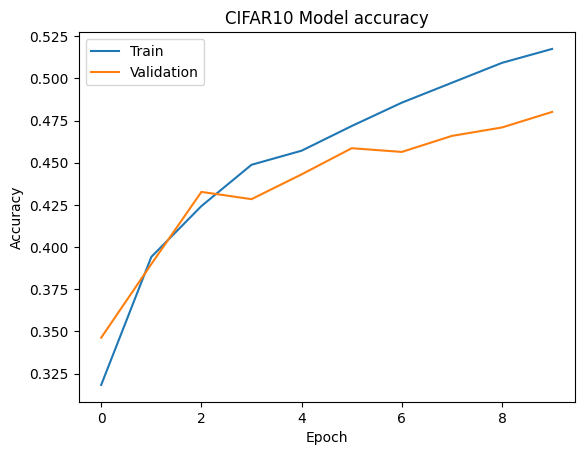

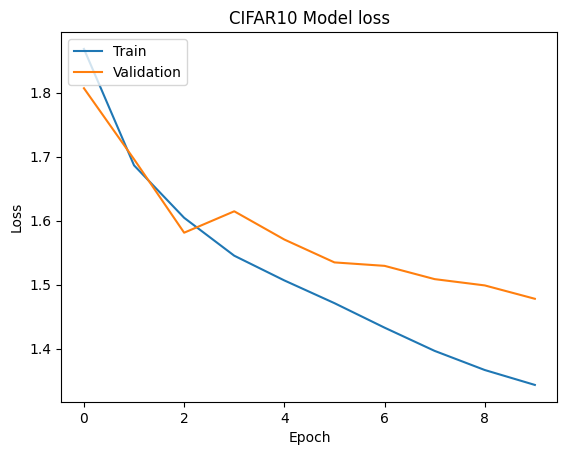

In [25]:


# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('CIFAR10 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()	
# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('CIFAR10 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()	


